In [2]:
# 1. Importing Libraries and Loading the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Quick look
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# 2. Data Overview

# Dataset info
print("### Dataset Info ###")
df.info()

# Missing values
print("\n### Missing Values per Column ###")
print(df.isnull().sum())

# Descriptive statistics
print("\n### Descriptive Statistics ###")
df.describe(include='all').T


### Dataset Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

### Missing Values per Column ###
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duratio

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 3. Data Cleaning

# Remove duplicates
df = df.drop_duplicates()

# Fill missing categorical values
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# Convert 'date_added' to datetime and extract 'year_added'
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)
df['year_added'] = df['date_added'].dt.year

print("After cleaning:")
df.info()


After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


C:\Users\G6X\AppData\Local\Temp\ipykernel_6188\3899806962.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


In [5]:
# 4. Basic Exploratory Analysis

# Count of Movies vs TV Shows
content_type = df['type'].value_counts()
print("### Movies vs TV Shows ###")
print(content_type)

# Top 10 countries
top_countries = df['country'].value_counts().head(10)
print("\n### Top 10 Countries ###")
print(top_countries)

# Top 10 ratings
top_ratings = df['rating'].value_counts().head(10)
print("\n### Top 10 Ratings ###")
print(top_ratings)


### Movies vs TV Shows ###
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

### Top 10 Countries ###
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

### Top 10 Ratings ###
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


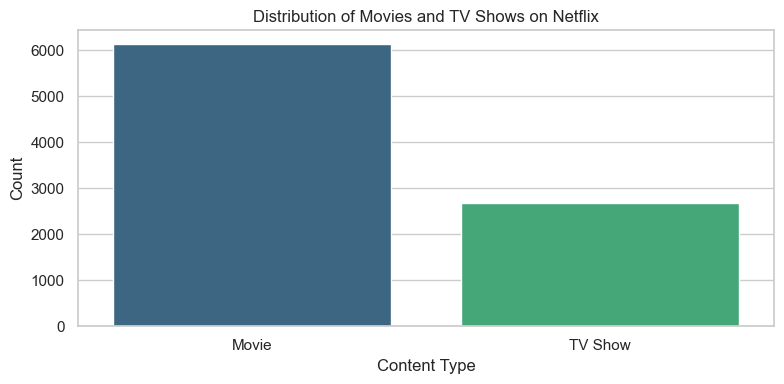

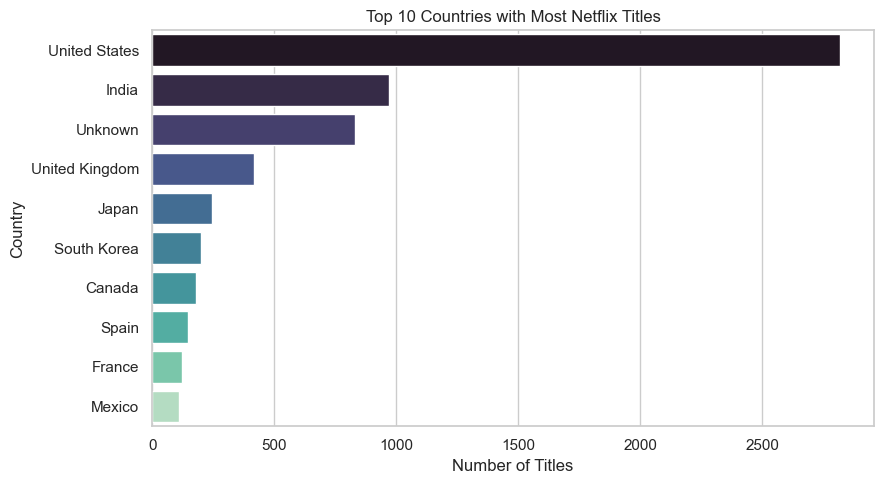

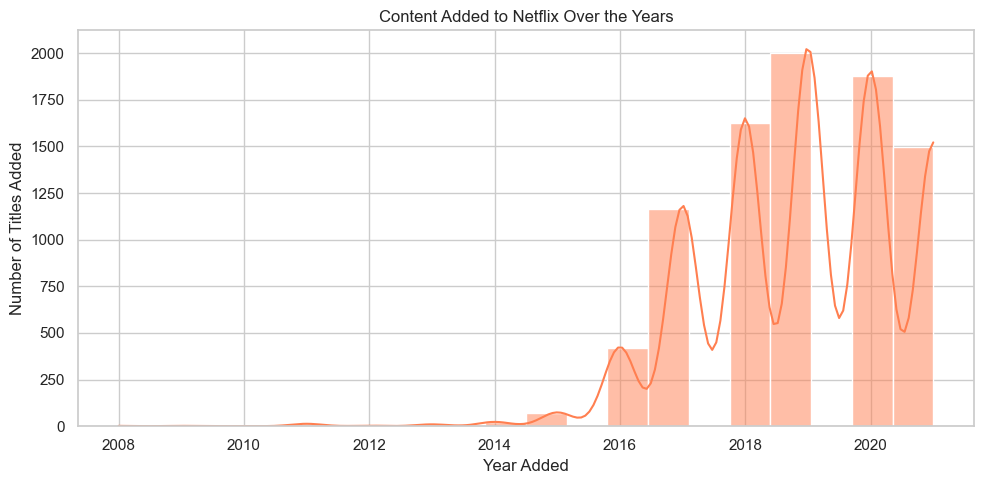

In [6]:
# 5. Data Visualizations (optimized for GitHub display)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# 1️⃣ Movies vs TV Shows
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='type', hue='type', palette='viridis', legend=False)
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../assets/movies_vs_tvshows.png', dpi=150, bbox_inches='tight')
plt.show()

# 2️⃣ Top 10 Countries by Content Count
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(9,5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='mako', legend=False)
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('../assets/top_countries.png', dpi=150, bbox_inches='tight')
plt.show()

# 3️⃣ Content Added by Year
plt.figure(figsize=(10,5))
sns.histplot(df['year_added'].dropna(), bins=20, kde=True, color='coral')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.savefig('../assets/content_by_year.png', dpi=150, bbox_inches='tight')
plt.show()


In [7]:
# 6️⃣ Summary Insights

# 1. Count Movies vs TV Shows
movie_count = df[df['type'] == 'Movie'].shape[0]
show_count = df[df['type'] == 'TV Show'].shape[0]
total = len(df)

# 2. Top country
top_country = df['country'].value_counts().idxmax()

# 3. Most common rating
top_rating = df['rating'].value_counts().idxmax()

print("🎬 Netflix Content Summary")
print(f"Total Titles: {total}")
print(f"Movies: {movie_count} ({(movie_count/total)*100:.1f}%)")
print(f"TV Shows: {show_count} ({(show_count/total)*100:.1f}%)")
print(f"Top Content-Producing Country: {top_country}")
print(f"Most Common Rating: {top_rating}")

# Insight message
print("\n📈 Insights:")
print("• Netflix's catalog is dominated by Movies, which make up around 70% of all titles.")
print("• The United States is the largest content producer, followed by India and the UK.")
print("• The platform's growth accelerated after 2015, with most titles added between 2018–2020.")
print("• 'TV-MA' is the most common rating, showing Netflix's focus on mature audience content.")


🎬 Netflix Content Summary
Total Titles: 8807
Movies: 6131 (69.6%)
TV Shows: 2676 (30.4%)
Top Content-Producing Country: United States
Most Common Rating: TV-MA

📈 Insights:
• Netflix's catalog is dominated by Movies, which make up around 70% of all titles.
• The United States is the largest content producer, followed by India and the UK.
• The platform's growth accelerated after 2015, with most titles added between 2018–2020.
• 'TV-MA' is the most common rating, showing Netflix's focus on mature audience content.
